In [18]:
# Import dataset BNCI2014_001
import moabb 
from moabb.datasets import BNCI2014_001

# Load the dataset
df = BNCI2014_001()

In [13]:
print(df.subject_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [21]:
print(df.get_data())

{1: {'0train': {'0': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '1': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '2': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '3': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '4': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '5': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>}, '1test': {'0': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '1': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '2': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '3': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '4': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '5': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>}}, 2: {'0train': {'0': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '1': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '2': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '3': <RawAr

In [22]:
# Access the raw EEG data for Subject 1, Training Set 0
subject_1_train_0_data = df.get_data()[1]['0train']['0']

In [25]:
import pandas as pd
from mne.io import RawArray
import os
# Function to convert RawArray to DataFrame and save as CSV
def convert_and_save_to_csv(raw_array, file_path):
    data = raw_array.get_data().T  # Transpose data for proper shape
    channels = raw_array.ch_names
    df = pd.DataFrame(data, columns=channels)
    df.to_csv(file_path, index=False)

# Specify the output directory for CSV files
output_directory = r"C:\Users\Joel\Desktop\PYTHON\Learning python"

# Loop through subjects and sets to export data to CSV
for subject_id in df.get_data():
    for set_key in df.get_data()[subject_id]:
        raw_array = df.get_data()[subject_id][set_key]['0']  # Selecting the first trial for demonstration
        file_name = f"subject_{subject_id}_set_{set_key}.csv"
        file_path = os.path.join(output_directory, file_name)
        convert_and_save_to_csv(raw_array, file_path)


             Fz           FC3       FC1       FCz       FC2       FC4  \
0  3.417969e-07  2.441406e-07 -0.000003 -0.000008 -0.000006 -0.000005   
1 -6.347656e-06 -7.958984e-06 -0.000010 -0.000015 -0.000009 -0.000010   
2 -1.806641e-06 -7.177734e-06 -0.000008 -0.000011 -0.000005 -0.000005   
3 -9.570312e-06 -1.176758e-05 -0.000016 -0.000016 -0.000014 -0.000010   
4 -1.293945e-05 -1.469727e-05 -0.000017 -0.000022 -0.000017 -0.000016   

             C5        C3        C1        Cz  ...       CPz       CP2  \
0  9.765625e-07 -0.000006 -0.000011 -0.000012  ... -0.000010 -0.000010   
1 -4.394531e-06 -0.000014 -0.000017 -0.000018  ... -0.000015 -0.000012   
2 -2.929687e-07 -0.000011 -0.000013 -0.000014  ... -0.000010 -0.000009   
3 -8.105469e-06 -0.000015 -0.000021 -0.000020  ... -0.000015 -0.000014   
4 -4.052734e-06 -0.000015 -0.000020 -0.000023  ... -0.000018 -0.000017   

        CP4        P1        Pz        P2       POz      EOG1      EOG2  \
0 -0.000007 -0.000009 -0.000008 -0.000007

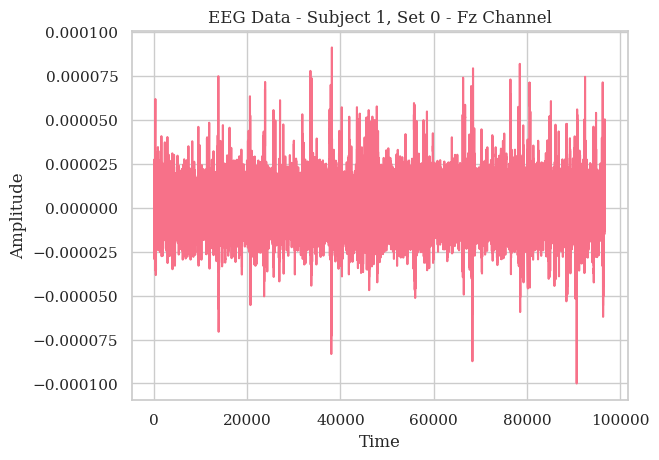

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load one CSV file
csv_file_path = r"C:\Users\Joel\Desktop\PYTHON\Learning python\subject_1_set_0train.csv"
df = pd.read_csv(csv_file_path)

# Remove the 'stim' column
df = df.drop(columns=['stim'], errors='ignore')

# Display the first few rows of the DataFrame after removing 'stim'
print(df.head())

# Plot the data using the 'Fz' channel (or any other channel)
plt.plot(df['Fz'])
plt.title('EEG Data - Subject 1, Set 0 - Fz Channel')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming 'X' is already defined and contains your features
X = df.copy()
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Build the autoencoder model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(X_train.shape[1])
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model (set epochs to 20
model.fit(X_train, X_train, epochs=20, batch_size=32, validation_data=(X_test, X_test))

# Use the encoder part as a feature extractor
encoder = models.Model(inputs=model.input, outputs=model.layers[2].output)

# Extract features using the encoder
features_train = encoder.predict(X_train)
features_test = encoder.predict(X_test)

# Calculate reconstruction error (optional)
mse_train = mean_squared_error(X_train, model.predict(X_train))
mse_test = mean_squared_error(X_test, model.predict(X_test))
print(f"Mean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")


Epoch 1/20
2419/2419 [==============================] - 10s 3ms/step - loss: 0.0318 - val_loss: 0.0077
Epoch 2/20
2419/2419 [==============================] - 6s 3ms/step - loss: 0.0072 - val_loss: 0.0140
Epoch 3/20
2419/2419 [==============================] - 6s 3ms/step - loss: 0.0058 - val_loss: 0.0032
Epoch 4/20
2419/2419 [==============================] - 6s 3ms/step - loss: 0.0053 - val_loss: 0.0097
Epoch 5/20
2419/2419 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 6/20
2419/2419 [==============================] - 7s 3ms/step - loss: 0.0042 - val_loss: 0.0013
Epoch 7/20
2419/2419 [==============================] - 6s 2ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 8/20
2419/2419 [==============================] - 6s 2ms/step - loss: 0.0022 - val_loss: 0.0041
Epoch 9/20
2419/2419 [==============================] - 6s 2ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 10/20
2419/2419 [==============================] - 6s 2ms/step - loss: 0.00

In [ ]:
import tensorflow as tf

# Assuming X_train and y_train are your training data and labels
# Define your model

# Increase batch size based on your available RAM
batch_size = 1024

# Create a TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_dataset, epochs=5)
